In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

22096


In [14]:
fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors',
             'save_folder':r'F:\Pu_Temp\20220418-P_brain_M1_nonclear_adaptors',
             'experiment_type': 'RNA',
             'num_threads': 44,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20220816-Corrections_lumencor_from_60_to_13',
             'shared_parameters':{
                     'single_im_size':[13,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 800,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

# resample H0

In [36]:
old_h0_folder = os.path.join(fov_param['data_folder'], 'H0M1')
new_h0_folder = old_h0_folder+'_short'
if not os.path.exists(new_h0_folder):
    print(new_h0_folder)
    os.makedirs(new_h0_folder)

\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1_short


In [49]:
num_channels = 4

In [64]:
from shutil import copyfile
for _fl in sorted(os.listdir(old_h0_folder)):
    _source_fl = os.path.join(old_h0_folder, _fl)
    _target_fl = os.path.join(new_h0_folder, _fl)
    if os.path.exists(_target_fl):
        continue
    else:
        print(_source_fl)
    if '.dax' in _fl:
        _im = visual_tools.DaxReader(_source_fl, swap_axis=False).loadAll()
        _sel_frame_ids = np.array([_i for _i in range(len(_im)) if _i % (4*num_channels) < num_channels])
        _writer = io_tools.data.DaxWriter(_target_fl)
        for _id in _sel_frame_ids:
            _writer.addFrame(_im[_id])
        _writer.close()
    elif '.inf' in _fl:
        continue
    else:
        copyfile(_source_fl, _target_fl)
    
#    break

\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_003.dax
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_003.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_003.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_003.xml
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_004.dax
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_004.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_004.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_004.xml
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_005.dax
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_005.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonc

\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_025.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_025.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_025.xml
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_026.dax
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_026.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_026.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_026.xml
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_027.dax
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_027.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_027.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_no

\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_047.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_047.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_047.xml
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_048.dax
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_048.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_048.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_048.xml
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_049.dax
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_049.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_049.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_no

\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_069.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_069.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_069.xml
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_070.dax
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_070.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_070.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_070.xml
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_071.dax
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_071.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_071.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_no

\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_091.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_091.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_091.xml
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_092.dax
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_092.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_092.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_092.xml
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_093.dax
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_093.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_093.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_no

\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_113.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_113.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_113.xml
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_114.dax
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_114.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_114.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_114.xml
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_115.dax
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_115.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_115.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_no

\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_135.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_135.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_135.xml
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_136.dax
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_136.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_136.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_136.xml
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_137.dax
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_137.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_137.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_no

\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_157.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_157.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_157.xml
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_158.dax
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_158.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_158.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_158.xml
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_159.dax
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_159.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_159.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_no

\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_179.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_179.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_179.xml
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_180.dax
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_180.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_180.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_180.xml
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_181.dax
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_181.off
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\H0M1\Conv_zscan_181.power
\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_no

# re-sample corrections

In [11]:
source_correction_folder = r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50'
target_correction_folder = r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20220816-Corrections_lumencor_from_60_to_13'
if not os.path.exists(target_correction_folder):
    os.makedirs(target_correction_folder)

In [35]:
from shutil import copyfile
for _fl in os.listdir(source_correction_folder):
    print(_fl)

    if '_50_' not in _fl:
        if os.path.exists(os.path.join(target_correction_folder, _fl)):
            continue
        copyfile(os.path.join(source_correction_folder, _fl), 
                 os.path.join(target_correction_folder, _fl)
                )
    else:
        if os.path.exists(os.path.join(target_correction_folder, _fl.replace('_50_','_13_'))):
            continue
        _info = np.load(os.path.join(source_correction_folder, _fl), allow_pickle=True)
        #print(_info)
        if isinstance(_info, dict):
            _info['constants'][0][0] = _info['constants'][0][0] / 4
            _info['constants'][1][0] = _info['constants'][1][0] / 4
            _info['constants'][2][0] = _info['constants'][2][0] / 4
            _info['ref_center'][0] = int(_info['ref_center'][0] / 4)
            # save
            pickle.dump(_info, open(os.path.join(target_correction_folder, _fl.replace('_50_','_13_')),'wb'))
        elif isinstance(_info, np.ndarray):
            _sel_layers = _info[:,::4]
            np.save(os.path.join(target_correction_folder, _fl.replace('_50_','_13_').replace('.npy','')),
                    _sel_layers)


illumination_correction_750_2048x2048.npy
illumination_correction_647_2048x2048.npy
illumination_correction_561_2048x2048.npy
illumination_correction_488_2048x2048.npy
illumination_correction_405_2048x2048.npy
chromatic_correction_750_647_50_2048_2048_const.pkl
chromatic_correction_561_647_50_2048_2048_const.pkl
chromatic_correction_750_647_50_2048_2048.npy
chromatic_correction_561_647_50_2048_2048.npy
bleedthrough_correction_750_647_561_2048_2048.npy
bleedthrough_correction_750_647_2048_2048.npy


# Fov

In [353]:
fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors',
             'save_folder':r'F:\Pu_Temp\20220418-P_brain_M1_nonclear_adaptors',
             'experiment_type': 'RNA',
             'num_threads': 44,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20220816-Corrections_lumencor_from_60_to_13',
             'shared_parameters':{
                     'single_im_size':[13,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 800,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

In [354]:
_fov_id = 2

In [355]:
fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          _save_info_to_file=False, # whether overwrite
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 13
- Number of field of views: 200
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_0\20220418-P_brain_M1_nonclear_adaptors\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H0M1_short', 'H1M2', 'H2M3', 'H3M4', 'H4M5', 'H5M6', 'H6M7', 'H7M8', 'H8M9', 'H9M10', 'H10M11', 'H11M12'])
- 12 folders are found according to color-usage annotation.
+ loading fov_info from file: F:\Pu_Temp\20220418-P_brain_M1_nonclear_adaptors\Conv_zscan_002.hdf5
++ base attributes loaded:['dapi_im', 'merfish_ref_im'] in 0.920s.
+ loading correction from file: F:\Pu_Temp\20220418-P_brain_M1_nonclear_adaptors\Conv_zscan_002.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segme

In [357]:
fov_dapi_im = fov._load_dapi_image()

directly return existing attribute.


In [358]:
# 2. Process image into candidate spots
fov.parallel = True
setattr(fov, "merfish_ref_id", 0)
fov._process_image_to_spots('merfish', 
                            _sel_ids=[1,2,3,22,23],
                            #_sel_ids=[23],
                            _load_common_reference=True, _load_with_multiple=False,
                            _save_images=True,
                            _warp_images=True, _fit_spots=False,
                            _overwrite_drift=False, _overwrite_image=True,
                            _overwrite_spot=False)

-- folders not selected, allow processing all 12 folders
-- checking merfish, region:[1 2] in 0.009s.
-- checking merfish, region:[3] in 0.006s.
-- checking merfish, region:[22] in 0.007s.
-- checking merfish, region:[23] in 0.007s.
+ Start multi-processing of pre-processing for 4 images with 44 threads
++ processing merfish ids: [ 1  2  3 22 23] , finish in 70.78s.


In [359]:
vis_ids = np.array([0,1,2,21,22], dtype=np.int32)
with h5py.File(fov.save_filename, 'r') as _f:
    _grp = _f['merfish']
    _ims = _grp['ims'][vis_ids,:,:,:]
    _ids = _grp['ids'][vis_ids]

In [360]:
# load segmentation_mask
segLabels = np.load(os.path.join(fov.data_folder[0], 'Segmentation', 'watershed', f"segmentation_label_{fov.fov_id}.npy"))

transSegLabels = np.flip(segLabels.transpose((0,2,1)),axis=(2,))

In [361]:
from skimage.measure import find_contours

cell_id = 33 # 96

vertices = (find_contours((transSegLabels==cell_id).max(0))[0])

xs, ys = np.where((transSegLabels==cell_id).any(0))

size_x = np.max(xs) - np.min(xs)
size_y = np.max(ys) - np.min(ys)
print(size_x, size_y)

radius = np.round( (max(size_x, size_y) + 20)/2 )

_center = np.round([np.median(xs), np.median(ys)])

crop = ia.classes.preprocess.ImageCrop_3d([[0, len(_ims[0])], 
                                           [_center[0]-radius, _center[0]+radius], 
                                           [_center[1]-radius, _center[1]+radius],])

104 141


In [362]:
pixel_sizes = fov.shared_parameters['distance_zxy']

<IPython.core.display.Javascript object>


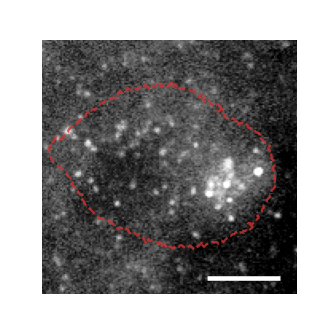

<IPython.core.display.Javascript object>


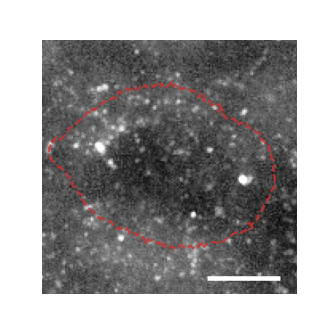

<IPython.core.display.Javascript object>


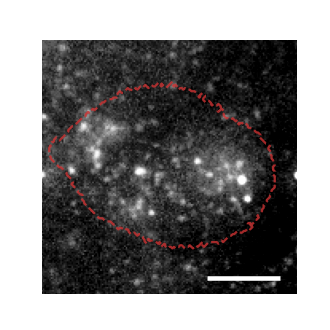

<IPython.core.display.Javascript object>


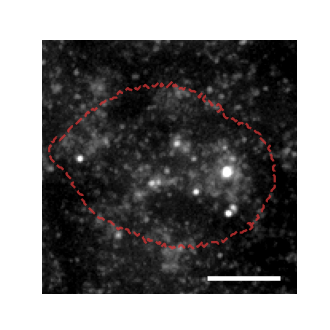

In [367]:
# select im
for _id, _im in zip(_ids[:-1], _ims[:-1]):
    _crop_im = _im[crop.to_slices()]
    _pixel_values = _im[transSegLabels==cell_id]
    _pixel_values = _pixel_values[_pixel_values>0]
    vmin, vmax = scipy.stats.scoreatpercentile(_pixel_values, 50), scipy.stats.scoreatpercentile(_crop_im, 99.99)
    
    fig, ax = plt.subplots(figsize=(1,1),dpi=300)
    
    ax.imshow(_im.max(0), vmin=vmin, vmax=vmax, cmap='Greys_r')

    ax.plot(vertices[:,1], vertices[:,0], linestyle='--', color=[0.8,0.2,0.2,0.8], linewidth=0.5)
    ax.set_ylim([_center[0]-radius, _center[0]+radius])
    ax.set_xlim([_center[1]-radius, _center[1]+radius])

    ax.tick_params('both', labelsize=7, 
                   width=0, length=0,
                   pad=1, labelleft=False, labelbottom=False) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(0) for i in ax.spines.items()]

    ax.hlines(_center[0]-radius+10, 
              _center[1]+radius-10 - 5000/pixel_sizes[-1], _center[1]+radius-10, 
              colors=[1,1,1], linewidth=1)
    
    figure_panel_filename = os.path.join(fov.save_folder, f"Im_maxProj_wContour_fov_{fov.fov_id}_cell_{cell_id}_bit_{_id}.pdf")
    fig.savefig(figure_panel_filename, transparent=True)
    figure_panel_filename = os.path.join(fov.save_folder, f"Im_maxProj_wContour_fov_{fov.fov_id}_cell_{cell_id}_bit_{_id}.png")
    fig.savefig(figure_panel_filename, transparent=True, bbox_inches='tight', pad_inches=0)


In [343]:
import pandas as pd
# 
barcode_folder = r'\\10.245.74.158\Chromatin_NAS_8\MERFISH\v2\20220418-storm6\Decode\barcodes'

barcode_filename = os.path.join(barcode_folder, f"barcode_data_{fov.fov_id}.h5")

barcode_df = pd.read_csv(r'\\10.245.74.158\Chromatin_NAS_8\MERFISH\v2\20220418-storm6\ExportBarcodes\barcodes.csv')


global_positions = pd.read_csv(r'\\10.245.74.158\Chromatin_NAS_8\MERFISH\v2\20220418-storm6\positions.csv', 
                               header=None)
global_positions

,0,1
0,-1659.10,751.95
1,-1657.85,551.05
2,-1658.25,349.55
3,-1457.55,350.65
4,-1458.45,552.70
...,...,...
195,4304.65,-1373.70
196,4304.65,-1174.85
197,4304.70,-972.60
198,4505.30,-1776.30


In [344]:
fov_barcode_df = barcode_df[(barcode_df['fov']==fov.fov_id)].copy()
fov_global_pos = global_positions.iloc[fov.fov_id].values

In [345]:
fov_barcode_df[['local_x','local_y']] = (fov_barcode_df[['global_x','global_y']] - fov_global_pos) / (np.array(pixel_sizes[-2:])/1000)


In [346]:
fov_barcode_df['local_y'] = 2048 - fov_barcode_df['local_y']

<IPython.core.display.Javascript object>


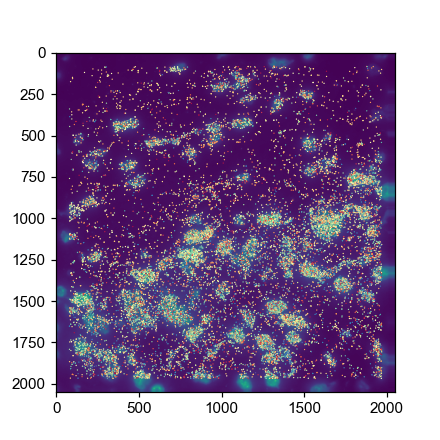

In [347]:
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(polyt_im)
ax.scatter(fov_barcode_df['local_y'], fov_barcode_df['local_x'], c=fov_barcode_df['barcode_id'],
            s=0.75, linewidth=0, cmap='Spectral')

<IPython.core.display.Javascript object>


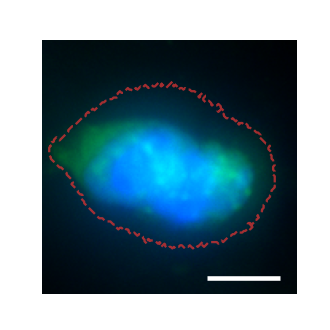

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [368]:
from scipy.stats import scoreatpercentile
_id = 'polyt'
_im = _ims[-1]

_crop_im = _im[crop.to_slices()]
_pixel_values = _im[transSegLabels==cell_id]
_pixel_values = _pixel_values[_pixel_values>0]
vmin, vmax = scipy.stats.scoreatpercentile(_pixel_values, 0), scipy.stats.scoreatpercentile(_crop_im, 99.)


fig, ax = plt.subplots(figsize=(1,1),dpi=300)


polyt_im = _im.max(0).copy()
polyt_im = (polyt_im - scoreatpercentile(polyt_im,10)) / (scoreatpercentile(polyt_im,99)-scoreatpercentile(polyt_im,5))

dapi_im = fov.dapi_im.max(0).copy()
dapi_im = (dapi_im - scoreatpercentile(dapi_im,10)) / (scoreatpercentile(dapi_im,99)-scoreatpercentile(dapi_im,20))

_full_im = np.array([np.zeros_like(dapi_im), 
                     polyt_im, 
                     dapi_im]).transpose((1,2,0))

ax.imshow(_full_im, 
          vmin=vmin, vmax=vmax, cmap='Greys_r')

ax.plot(vertices[:,1], vertices[:,0], linestyle='--', color=[0.8,0.2,0.2,0.8], linewidth=0.5)
ax.set_ylim([_center[0]-radius, _center[0]+radius])
ax.set_xlim([_center[1]-radius, _center[1]+radius])

ax.tick_params('both', labelsize=7, 
               width=0, length=0,
               pad=1, labelleft=False, labelbottom=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(0) for i in ax.spines.items()]

ax.hlines(_center[0]-radius+10, 
          _center[1]+radius-10 - 5000/pixel_sizes[-1], _center[1]+radius-10, 
          colors=[1,1,1], linewidth=1)

figure_panel_filename = os.path.join(fov.save_folder, f"Im_maxProj_wContour_fov_{fov.fov_id}_cell_{cell_id}_bit_{_id}.pdf")
fig.savefig(figure_panel_filename, transparent=True)
figure_panel_filename = os.path.join(fov.save_folder, f"Im_maxProj_wContour_fov_{fov.fov_id}_cell_{cell_id}_bit_{_id}.png")
fig.savefig(figure_panel_filename, transparent=True, bbox_inches='tight', pad_inches=0)

<IPython.core.display.Javascript object>


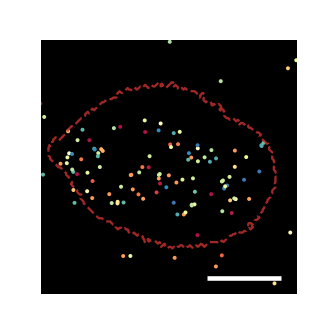

In [371]:
fig, ax = plt.subplots(figsize=(1,1),dpi=300)
ax.set(facecolor = "black")
#ax.imshow(_im.max(0), vmin=vmin, vmax=vmax, cmap='Greys_r')
ax.scatter(fov_barcode_df['local_y'], fov_barcode_df['local_x'], c=fov_barcode_df['barcode_id'],
            s=0.75, linewidth=0, cmap='Spectral')
ax.plot(vertices[:,1], vertices[:,0], linestyle='--', color=[0.8,0.2,0.2,0.8], linewidth=0.5)
ax.set_ylim([_center[0]-radius, _center[0]+radius])
ax.set_xlim([_center[1]-radius, _center[1]+radius])

ax.tick_params('both', labelsize=7, 
               width=0, length=0,
               pad=1, labelleft=False, labelbottom=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(0) for i in ax.spines.items()]

ax.hlines(_center[0]-radius+10, 
          _center[1]+radius-10 - 5000/pixel_sizes[-1], _center[1]+radius-10, 
          colors=[1,1,1], linewidth=1)

figure_panel_filename = os.path.join(fov.save_folder, f"Im_maxProj_wContour_fov_{fov.fov_id}_cell_{cell_id}_decoded.pdf")
fig.savefig(figure_panel_filename, transparent=False, bbox_inches='tight', pad_inches=0)
figure_panel_filename = os.path.join(fov.save_folder, f"Im_maxProj_wContour_fov_{fov.fov_id}_cell_{cell_id}_decoded.png")
fig.savefig(figure_panel_filename, transparent=False, bbox_inches='tight', pad_inches=0)

In [ ]:
plt.figure

In [282]:

fov_barcode_df

,barcode_id,global_x,global_y,global_z,x,y,fov,cell_index,local_x,local_y
31845,54,-1594.3058,545.44824,0.0,592.07660,1813.87270,2,-1,592.075926,1813.872593
31846,67,-1619.4070,509.16300,0.0,359.65787,1477.89810,2,-1,359.657407,1477.898148
31847,68,-1528.1309,523.07050,0.0,1204.80630,1606.67150,2,-1,1204.806481,1606.671296
31848,89,-1568.6068,380.37490,0.0,830.02980,285.41592,2,-1,830.029630,285.415741
31849,101,-1630.0680,383.74612,0.0,260.94420,316.63092,2,-1,260.944444,316.630741
...,...,...,...,...,...,...,...,...,...,...
52591,239,-1523.9891,456.86550,12.0,1243.15660,993.66230,2,-1,1243.156481,993.662037
52592,239,-1475.8033,484.22598,12.0,1689.32100,1247.00000,2,-1,1689.321296,1246.999815
52593,239,-1479.4028,510.91870,12.0,1655.99270,1494.15480,2,-1,1655.992593,1494.154630
52594,239,-1466.2881,518.44850,12.0,1777.42500,1563.87510,2,-1,1777.425000,1563.875000


In [272]:
fov_barcode_df = barcode_df[(barcode_df['fov']==fov.fov_id)]

In [250]:
with h5py.File(barcode_filename, 'r') as _f:
    print(_f['barcodes']['_i_table']['index'].keys())
    #table = _f['barcodes']['table'][:]
    i_table = _f['barcodes']['_i_table']['index'][:]

<KeysViewHDF5 ['abounds', 'bounds', 'indices', 'indicesLR', 'mbounds', 'mranges', 'ranges', 'sorted', 'sortedLR', 'zbounds']>


TypeError: Accessing a group is done with bytes or str,  not <class 'slice'>

In [244]:
table[100]

(212, [ 2.79303217e+00,  3.51003861e+00,  5.35399675e-01,  4.39478576e-01,  1.02179816e+03,  1.16000000e+02,  0.00000000e+00, -1.54789575e+03,  3.62078003e+02,  0.00000000e+00,  1.20342135e-01,  2.49576345e-02,  3.13143343e-01,  3.73471081e-02,  1.04395079e-03,  3.82799469e-02,  4.12525773e-01,  4.77779023e-02,  7.59121850e-02,  2.31923256e-02,  9.41463038e-02,  4.94314218e-03,  1.34024858e-01,  1.08049950e-03,  5.59118748e-01,  1.45189662e-03,  2.39853859e-02,  4.23723549e-01,  6.12726854e-03,  1.45859778e-01,  1.17626868e-01,  9.69922543e-03], [-1], [0, 2, 3])

<IPython.core.display.Javascript object>


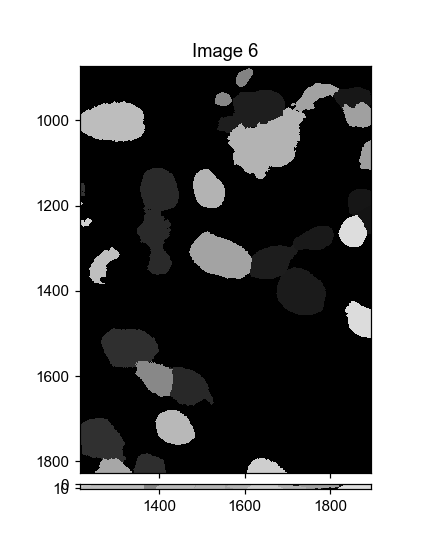

In [177]:
visual_tools.imshow_mark_3d_v2(list(_ims) + [transSegLabels,transSegLabels==33])

1

<IPython.core.display.Javascript object>


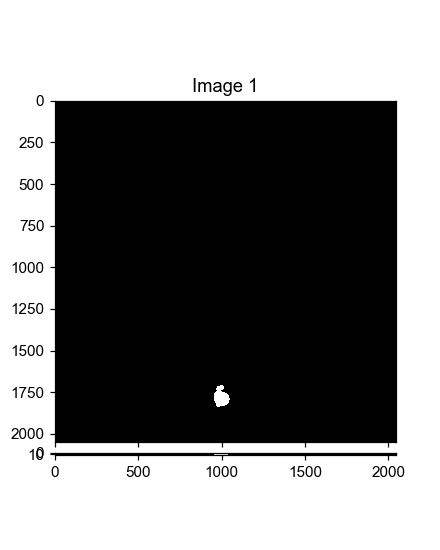

In [42]:
visual_tools.imshow_mark_3d_v2([transSegLabels==34, _ims[1]])